In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:
def oscillator(d, w0, x):
    w = np.sqrt(w0**2-d**2)
    phi = np.arctan(-d/w)
    A = 1/(2*np.cos(phi))
    cos = np.cos(phi+w*x)
    #sin = np.sin(phi+w*x)
    exp = np.exp(-d*x)
    y  = exp*2*A*cos
    return y

In [27]:
d=0.1
w0=3
x = np.linspace(0, 20, 5000).reshape(-1, 1)
y = oscillator(d, w0, x).reshape(-1, 1)
print(x.shape, y.shape)

(5000, 1) (5000, 1)


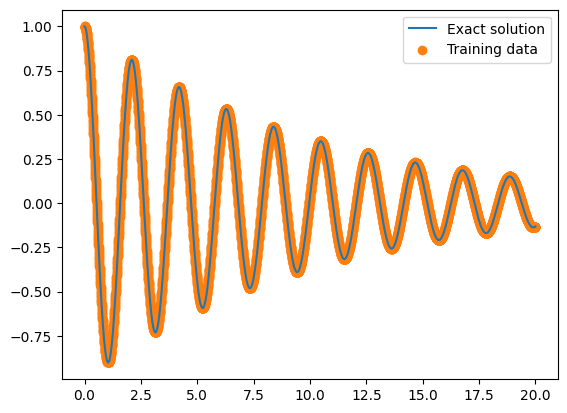

In [28]:
plt.figure()
plt.plot(x, y, label="Exact solution")
plt.scatter(x, y, color="tab:orange", label="Training data")
plt.legend()
plt.show()

In [29]:
x_train = x[0::2]
y_train= y[0::2]
print(x_train.shape, y_train.shape)

(2500, 1) (2500, 1)


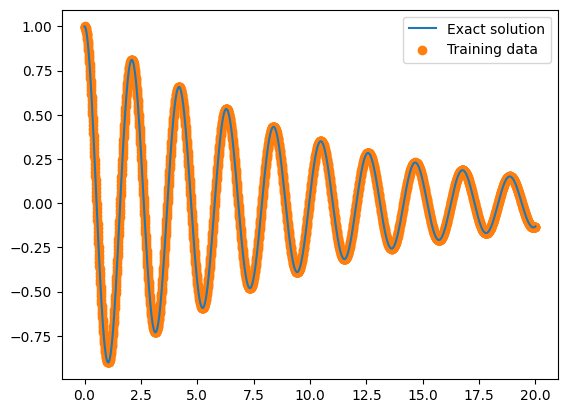

In [30]:
plt.figure()
plt.plot(x, y, label="Exact solution")
plt.scatter(x_train, y_train, color="tab:orange", label="Training data")
plt.legend()
plt.show()

In [31]:
x_train=x_train[0:int(len(x_train)/2)]
y_train=y_train[0:int(len(y_train)/2)]

In [32]:
len(x_train)

1250

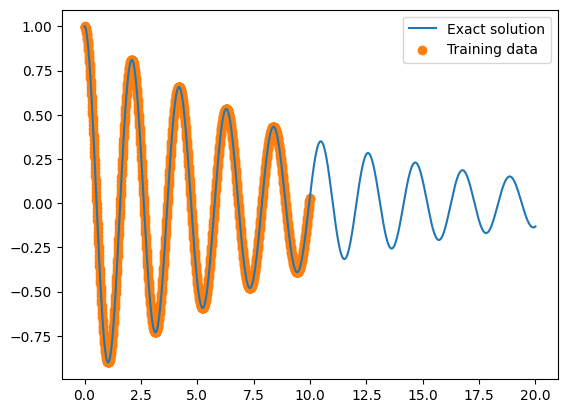

In [33]:
plt.figure()
plt.plot(x, y, label="Exact solution")
plt.scatter(x_train, y_train, color="tab:orange", label="Training data")
plt.legend()
plt.show()

In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
regr = MLPRegressor(random_state=1, max_iter=5000,activation='relu').fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
y_pred=regr.predict(x_train)

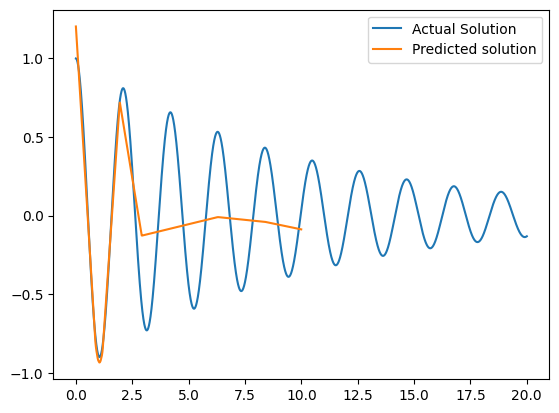

In [36]:
plt.plot(x,y,label='Actual Solution')
plt.plot(x_train, y_pred, label="Predicted solution")
#plt.scatter(x_pred, y, color="tab:orange", label="Training data")
plt.legend()
plt.show()